<a href="https://colab.research.google.com/github/jiin124/Kaggle/blob/main/Heart_Attack_Analysis_%26_Prediction_Dataset/Heart_Attack_Analysis_%26_Prediction_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

나이 : 환자의 나이

성별 : 환자의 성별

exang: 운동 유발 협심증(1 = 예, 0 = 아니오)

ca: 주요 선박 수(0-3)

cp : 흉통형 흉통형

값 1: 전형적인 협심증
값 2: 비정형 협심증
값 3: 협심증이 아닌 통증
값 4: 무증상
trtbps : 안정시 혈압(mmHg 단위)

chol : BMI 센서를 통해 가져온 콜레스테롤(mg/dl)

fbs : (공복 혈당 > 120 mg/dl) (1 = 참, 0 = 거짓)

rest_ecg : 휴식기 심전도 결과

값 0: 정상
값 1: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 하강 > 0.05mV)
값 2: Estes' 기준에 의한 좌심실 비대 가능성이 있거나 확실한 표시
thalach : 달성한 최대 심박수

목표: 0= 심장마비의 확률 감소 1= 심장마비의 더 높은 확률

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip '*.zip'

Archive:  heart-attack-analysis-prediction-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace o2Saturation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
col=df.columns
col

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
len(col)

14

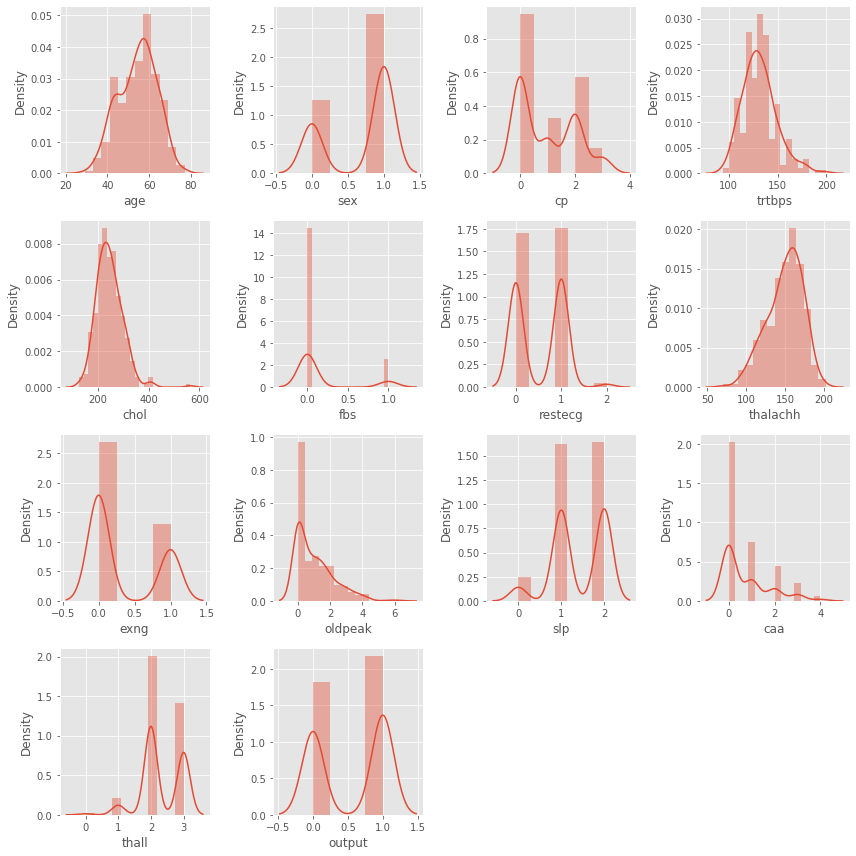

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(col):
  plt.subplot(4,4,i+1)
  sns.distplot(df.loc[:,colName])
plt.tight_layout()
plt.show()

In [40]:
num=['age', 'trtbps', 'chol', 'thalachh',
        'oldpeak']
cat=['sex', 'cp', 'fbs', 'restecg', 
       'exng', 'slp', 'caa', 'thall']

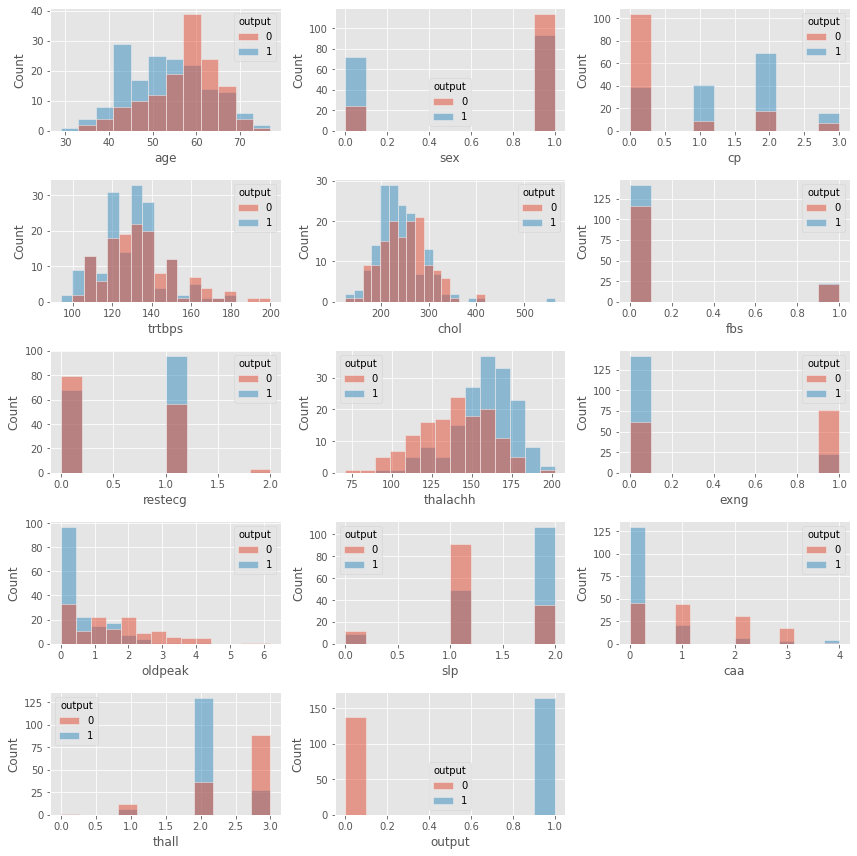

In [11]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(col):
  plt.subplot(5,3,i+1)
  sns.histplot(data=df,x=colName,hue='output')
plt.tight_layout()
plt.show()

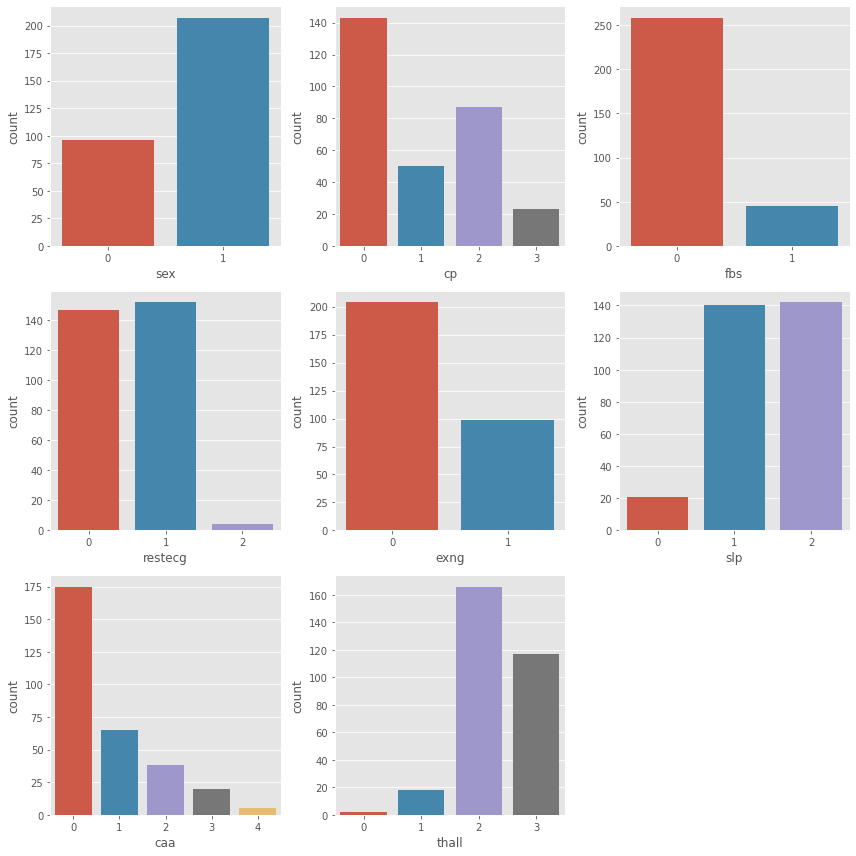

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(cat):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df,x=colName)
plt.tight_layout()
plt.show()

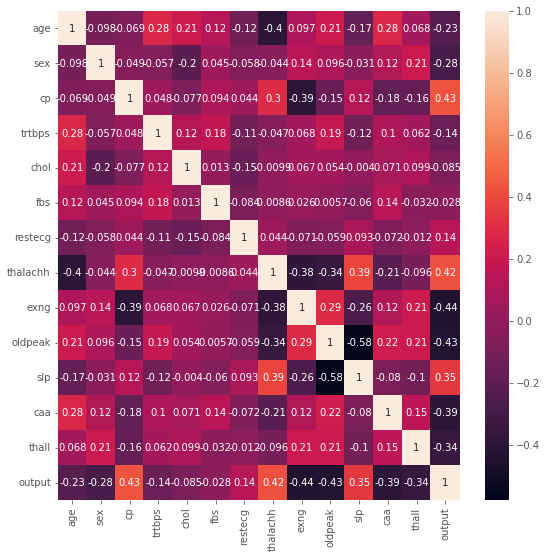

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [41]:
df1=df[num]
df1.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [42]:
#numeric 변수 스케일링
from sklearn.preprocessing import StandardScaler

st=StandardScaler()

for i in num:
  df1[i]=st.fit_transform(df[i].values.reshape(-1,1))


df1.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [43]:
df2=df[cat]
for i in cat:
  df2[i]=df2[i].astype('category')

df2.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sex      303 non-null    category
 1   cp       303 non-null    category
 2   fbs      303 non-null    category
 3   restecg  303 non-null    category
 4   exng     303 non-null    category
 5   slp      303 non-null    category
 6   caa      303 non-null    category
 7   thall    303 non-null    category
dtypes: category(8)
memory usage: 3.7 KB


In [45]:
df3=pd.get_dummies(df2,drop_first=True)

In [46]:
#합치기
data=pd.concat([df1,df3],axis=1)
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


## 데이터 나누기

In [47]:
from sklearn.model_selection import train_test_split

target=df['output']
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=0,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 22)
(242,)
(61, 22)
(61,)


In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 74 to 172
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        242 non-null    float64
 1   trtbps     242 non-null    float64
 2   chol       242 non-null    float64
 3   thalachh   242 non-null    float64
 4   oldpeak    242 non-null    float64
 5   sex_1      242 non-null    uint8  
 6   cp_1       242 non-null    uint8  
 7   cp_2       242 non-null    uint8  
 8   cp_3       242 non-null    uint8  
 9   fbs_1      242 non-null    uint8  
 10  restecg_1  242 non-null    uint8  
 11  restecg_2  242 non-null    uint8  
 12  exng_1     242 non-null    uint8  
 13  slp_1      242 non-null    uint8  
 14  slp_2      242 non-null    uint8  
 15  caa_1      242 non-null    uint8  
 16  caa_2      242 non-null    uint8  
 17  caa_3      242 non-null    uint8  
 18  caa_4      242 non-null    uint8  
 19  thall_1    242 non-null    uint8  
 20  thall_2  

## Modeling

In [49]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cat=CatBoostClassifier()
cat.fit(x_train,y_train,
        eval_set=[(x_train,y_train),(x_test,y_test)])
cat_pred=cat.predict(x_test)
accuracy_score(y_test,cat_pred)

Learning rate set to 0.022321
0:	learn: 0.6796753	test: 0.6796799	test1: 0.6837141	best: 0.6837141 (0)	total: 2.43ms	remaining: 2.43s
1:	learn: 0.6650014	test: 0.6650152	test1: 0.6701018	best: 0.6701018 (1)	total: 4.12ms	remaining: 2.06s
2:	learn: 0.6526734	test: 0.6526986	test1: 0.6608071	best: 0.6608071 (2)	total: 5.86ms	remaining: 1.95s
3:	learn: 0.6424790	test: 0.6425175	test1: 0.6521295	best: 0.6521295 (3)	total: 8.1ms	remaining: 2.02s
4:	learn: 0.6296139	test: 0.6296635	test1: 0.6423514	best: 0.6423514 (4)	total: 10.7ms	remaining: 2.14s
5:	learn: 0.6172542	test: 0.6173099	test1: 0.6336871	best: 0.6336871 (5)	total: 13.9ms	remaining: 2.3s
6:	learn: 0.6038652	test: 0.6039240	test1: 0.6233759	best: 0.6233759 (6)	total: 15.8ms	remaining: 2.24s
7:	learn: 0.5918032	test: 0.5918589	test1: 0.6150505	best: 0.6150505 (7)	total: 18ms	remaining: 2.23s
8:	learn: 0.5819869	test: 0.5820332	test1: 0.6044856	best: 0.6044856 (8)	total: 21.5ms	remaining: 2.36s
9:	learn: 0.5723195	test: 0.5723589	te

0.8688524590163934

## feature importance

In [50]:
final_importance=pd.concat([pd.Series(x_train.columns),pd.Series(cat.feature_importances_)],axis=1)
final_importance.columns=['feature','importance']
final_importance=final_importance.sort_values(by='importance',ascending=False)
final_importance

,feature,importance
4,oldpeak,10.857142
20,thall_2,9.974247
0,age,9.208239
2,chol,8.937198
1,trtbps,8.087610
3,thalachh,8.037889
15,caa_1,7.811785
5,sex_1,6.357918
12,exng_1,5.723294
16,caa_2,5.041208


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

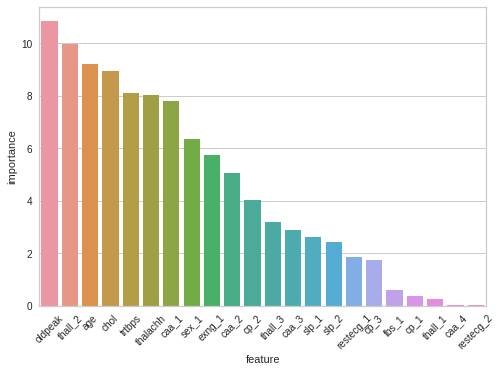

In [51]:
sns.barplot(data=final_importance,x='feature',y='importance')
plt.xticks(rotation=45)
